In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
import pandas as pd

#This allows to see all data column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data']) 
df['timestamp'] = pd.Timestamp('now')  # Create new column with title timestamp and have current date and time.
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954311e+07,1.954311e+07,False,NaN,1,NaN,NaN,None,2023-11-15T17:18:00.000Z,36405.805160,2.350063e+10,15.4402,0.170511,0.726078,2.992644,29.001015,37.220137,30.086886,7.114825e+11,50.9833,7.645219e+11,None,2023-11-15T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 22:20:40.529565
1,1027,Ethereum,ETH,ethereum,7783,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202560e+08,1.202560e+08,True,NaN,2,NaN,NaN,None,2023-11-15T17:18:00.000Z,2009.070722,1.309952e+10,14.7485,-0.311182,-1.271151,5.981429,27.074828,22.711527,15.337727,2.416029e+11,17.2909,2.416029e+11,None,2023-11-15T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 22:20:40.529565
2,825,Tether USDt,USDT,tether,65763,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.732327e+10,9.062366e+10,True,NaN,3,NaN,NaN,None,2023-11-15T17:17:00.000Z,1.000310,4.779603e+10,7.8054,-0.011669,0.030031,0.027997,0.003842,-0.009543,0.149660,8.735036e+10,6.2624,9.065177e+10,None,2023-11-15T17:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-15 22:20:40.529565
3,1839,BNB,BNB,bnb,1759,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517012e+08,1.517012e+08,False,NaN,4,NaN,NaN,None,2023-11-15T17:17:00.000Z,252.322816,9.246752e+08,2.2047,0.320076,3.140450,2.214734,18.206414,17.652166,11.869519,3.827768e+10,2.7442,3.827768e+10,None,2023-11-15T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 22:20:40.529565
4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,None,2023-11-15T17:18:00.000Z,0.635758,1.850210e+09,-47.9314,-0.480096,-2.579814,-7.616801,29.000015,26.903436,10.061332,3.411019e+10,2.4412,6.357583e+10,None,2023-11-15T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 22:20:40.529565
5,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.224233e+08,5.624643e+08,True,NaN,6,NaN,NaN,None,2023-11-15T17:18:00.000Z,61.309681,3.341972e+09,5.4745,-0.743380,12.049216,42.737239,161.656126,222.831552,165.399731,2.589864e+10,1.8558,3.448450e+10,None,2023-11-15T17:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 22:20:40.529565
6,3408,USDC,USDC,usd-coin,14943,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.391940e+10,2.391940e+10,False,NaN,7,NaN,NaN,None,2023-11-15T17:18:00.000Z,1.000112,6.012430e+09,9.6273,-0.002061,0.016406,0.003623,-0.013594,-0.020570,-0.018735,2.392208e+10,1.7123,2.392208e+10,None,2023-11-15T17:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-15 22:20:40.529565
7,2010,Cardano,ADA,cardano,972,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.527538e+10,3.635027e+10,False,NaN,8,NaN,NaN,None,2023-11-15T17:17:00.000Z,0.368984,4.081523e+08,-3.6605,-0.361656,1.395213,3.294337,46.898519,47.604547,36.452709,1.301605e+10,0.9332,1.660428e+10,None,2023-11-15T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 22:20:40.529565
8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.4184

In [11]:
## Creating API Function to automate the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data']) 
    df['timestamp'] = pd.to_datetime('now', utc=True)  # Create new column with title timestamp and have current date and time.
    df
    
    ## Creating New DataFrame
    if not os.path.isfile(r'E:\Study 2\Data Analyst BootCamp\Projects\Python\API.csv'):
        df.to_csv(r'E:\Study 2\Data Analyst BootCamp\Projects\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'E:\Study 2\Data Analyst BootCamp\Projects\Python\API.csv', mode='a', header=False)
    
    
    

In [12]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(30)  # Sleep for 30 seconds, Press stop button to terminate the loop and do further processing with created data.
exit()

api runner completed successfully
api runner completed successfully


KeyboardInterrupt: 

In [13]:
df72 = pd.read_csv(r'E:\Study 2\Data Analyst BootCamp\Projects\Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.954311e+07,1.954311e+07,False,NaN,1,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,36436.165359,2.345026e+10,14.9929,0.296352,0.444416,3.159645,29.499659,37.101268,30.169966,7.120758e+11,50.9093,7.651595e+11,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
1,1,1027,Ethereum,ETH,ethereum,7783,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202560e+08,1.202560e+08,True,NaN,2,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,2011.911233,1.311148e+10,16.0990,-0.016931,-1.434071,6.198143,27.604236,22.820840,15.454581,2.419445e+11,17.3054,2.419445e+11,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
2,2,825,Tether USDt,USDT,tether,65763,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.732327e+10,9.062366e+10,True,NaN,3,NaN,NaN,NaN,2023-11-15T17:33:00.000Z,1.000296,4.777645e+10,8.3314,-0.008916,0.043577,0.022987,-0.007562,-0.006913,0.127197,8.734913e+10,6.2461,9.065049e+10,NaN,2023-11-15T17:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-15 17:34:44.556669+00:00
3,3,1839,BNB,BNB,bnb,1759,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517012e+08,1.517012e+08,False,NaN,4,NaN,NaN,NaN,2023-11-15T17:33:00.000Z,252.371774,9.252270e+08,2.6842,0.293594,3.140591,2.342358,18.407389,17.587783,11.625782,3.828510e+10,2.7376,3.828510e+10,NaN,2023-11-15T17:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
4,4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,0.634952,1.841769e+09,-48.2010,-0.468699,-2.717393,-7.742544,28.949087,26.427096,9.899969,3.406692e+10,2.4367,6.349517e+10,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
5,5,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.224233e+08,5.624643e+08,True,NaN,6,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,61.367465,3.303715e+09,5.1656,-0.927779,13.203974,43.369341,162.355813,222.250646,165.873987,2.592304e+10,1.8533,3.451701e+10,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
6,6,3408,USDC,USDC,usd-coin,14943,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.391940e+10,2.391940e+10,False,NaN,7,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,1.000156,6.002948e+09,9.7327,-0.001068,0.023960,0.011494,0.009130,-0.001696,0.007958,2.392313e+10,1.7115,2.392313e+10,NaN,2023-11-15T17:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-15 17:34:44.556669+00:00
7,7,2010,Cardano,ADA,cardano,972,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.527538e+10,3.635027e+10,False,NaN,8,NaN,NaN,NaN,2023-11-15T17:33:00.000Z,0.369408,4.070517e+08,-3.7312,-0.106785,1.659192,3.373979,47.233152,47.799638,36.552424,1.303100e+10,0.9318,1.662335e+10,NaN,2023-11-15T17:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
8,8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"['

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [16]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19543106.00000,19543106.00000,False,NaN,1,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,36436.16536,23450256739.16349,14.99290,0.29635,0.44442,3.15964,29.49966,37.10127,30.16997,712075841847.21082,50.90930,765159472541.94995,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
1,1,1027,Ethereum,ETH,ethereum,7783,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120256040.31998,120256040.31998,True,NaN,2,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,2011.91123,13111483165.76566,16.09900,-0.01693,-1.43407,6.19814,27.60424,22.82084,15.45458,241944478348.28683,17.30540,241944478348.29001,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
2,2,825,Tether USDt,USDT,tether,65763,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,87323273300.69156,90623656719.70796,True,NaN,3,NaN,NaN,NaN,2023-11-15T17:33:00.000Z,1.00030,47776450268.90065,8.33140,-0.00892,0.04358,0.02299,-0.00756,-0.00691,0.12720,87349133154.39462,6.24610,90650493946.67000,NaN,2023-11-15T17:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-15 17:34:44.556669+00:00
3,3,1839,BNB,BNB,bnb,1759,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151701214.54429,151701214.54429,False,NaN,4,NaN,NaN,NaN,2023-11-15T17:33:00.000Z,252.37177,925227025.86573,2.68420,0.29359,3.14059,2.34236,18.40739,17.58778,11.62578,38285104664.98778,2.73760,38285104664.99000,NaN,2023-11-15T17:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
4,4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,0.63495,1841768565.52361,-48.20100,-0.46870,-2.71739,-7.74254,28.94909,26.42710,9.89997,34066916526.07367,2.43670,63495172647.06000,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
5,5,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,422423252.97778,562464256.98494,True,NaN,6,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,61.36746,3303714564.78937,5.16560,-0.92778,13.20397,43.36934,162.35581,222.25065,165.87399,25923044134.18181,1.85330,34517005526.89000,NaN,2023-11-15T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-15 17:34:44.556669+00:00
6,6,3408,USDC,USDC,usd-coin,14943,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,23919402469.28278,23919402469.28278,False,NaN,7,NaN,NaN,NaN,2023-11-15T17:34:00.000Z,1.00016,6002947978.01262,9.73270,-0.00107,0.02396,0.01149,0.00913,-0.00170,0.00796,23923133309.73681,1.71150,23923133309.74000,NaN,2023-11-15T17:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-15 17:34:44.556669+00:00
7,7,2010,Cardano,ADA,cardano,972,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35275377095.41200,36350273102.30800,False,NaN,8,NaN,NaN,NaN,2023-11-15T17:33:00.000Z,0.36941,407051736.43207,-3.73120,-0.10678,1.65919,3.37398,47.23315,47.79964,36.55242,13030997606.42404,0.93180,16

In [20]:
# Grouping the currencies so that we can look at percent change more easily 
dfgroup =df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',  'quote.USD.percent_change_30d',  'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
dfgroup


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.29635,0.44442,3.15964,29.49966,37.10127,30.16997
Ethereum,-0.01693,-1.43407,6.19814,27.60424,22.82084,15.45458
Tether USDt,-0.00892,0.04358,0.02299,-0.00756,-0.00691,0.12720
BNB,0.29359,3.14059,2.34236,18.40739,17.58778,11.62578
XRP,-0.46870,-2.71739,-7.74254,28.94909,26.42710,9.89997
Solana,-0.92778,13.20397,43.36934,162.35581,222.25065,165.87399
USDC,-0.00107,0.02396,0.01149,0.00913,-0.00170,0.00796
Cardano,-0.10678,1.65919,3.37398,47.23315,47.79964,36.55242
Dogecoin,-0.15060,0.36498,-0.81764,23.66744,18.99202,12.51969


In [23]:
type(dfgroup)

pandas.core.frame.DataFrame

In [44]:
dfgroup = dfgroup.rename(columns={'quote.USD.percent_change_1h': '1 Hour','quote.USD.percent_change_24h': '24 Hours'
                                 ,'quote.USD.percent_change_7d': '7 Days' , 'quote.USD.percent_change_30d': '30 Days'
                                 , 'quote.USD.percent_change_60d': '60 Days' , 'quote.USD.percent_change_90d': '90 Days'})

In [45]:
dfgroup

,1 Hour,24 Hours,7 Days,30 Days,60 Days,90 Days
name,,,,,,
Bitcoin,0.29635,0.44442,3.15964,29.49966,37.10127,30.16997
Ethereum,-0.01693,-1.43407,6.19814,27.60424,22.82084,15.45458
Tether USDt,-0.00892,0.04358,0.02299,-0.00756,-0.00691,0.12720
BNB,0.29359,3.14059,2.34236,18.40739,17.58778,11.62578
XRP,-0.46870,-2.71739,-7.74254,28.94909,26.42710,9.89997
Solana,-0.92778,13.20397,43.36934,162.35581,222.25065,165.87399
USDC,-0.00107,0.02396,0.01149,0.00913,-0.00170,0.00796
Cardano,-0.10678,1.65919,3.37398,47.23315,47.79964,36.55242
Dogecoin,-0.15060,0.36498,-0.81764,23.66744,18.99202,12.51969


In [46]:
dfstack = dfgroup.stack()  ## Displaying above table in the form of stack
dfstack
 

name                 
Bitcoin      1 Hour       0.29635
             24 Hours     0.44442
             7 Days       3.15964
             30 Days     29.49966
             60 Days     37.10127
             90 Days     30.16997
Ethereum     1 Hour      -0.01693
             24 Hours    -1.43407
             7 Days       6.19814
             30 Days     27.60424
             60 Days     22.82084
             90 Days     15.45458
Tether USDt  1 Hour      -0.00892
             24 Hours     0.04358
             7 Days       0.02299
             30 Days     -0.00756
             60 Days     -0.00691
             90 Days      0.12720
BNB          1 Hour       0.29359
             24 Hours     3.14059
             7 Days       2.34236
             30 Days     18.40739
             60 Days     17.58778
             90 Days     11.62578
XRP          1 Hour      -0.46870
             24 Hours    -2.71739
             7 Days      -7.74254
             30 Days     28.94909
             60 Days     2

In [47]:
dfStackNew = dfstack.to_frame(name='values')
dfStackNew

values
name                          
Bitcoin     1 Hour     0.29635
            24 Hours   0.44442
            7 Days     3.15964
            30 Days   29.49966
            60 Days   37.10127
            90 Days   30.16997
Ethereum    1 Hour    -0.01693
            24 Hours  -1.43407
            7 Days     6.19814
            30 Days   27.60424
            60 Days   22.82084
            90 Days   15.45458
Tether USDt 1 Hour    -0.00892
            24 Hours   0.04358
            7 Days     0.02299
            30 Days   -0.00756
            60 Days   -0.00691
            90 Days    0.12720
BNB         1 Hour     0.29359
            24 Hours   3.14059
            7 Days     2.34236
            30 Days   18.40739
            60 Days   17.58778
            90 Days   11.62578
XRP         1 Hour    -0.46870
            24 Hours  -2.71739
            7 Days    -7.74254
            30 Days   28.94909
            60 Days   26.42710
            90 Days    9.89997
Solana      1 Hour    -0.92778
            24 Hours  13.20397
            7 Days    43.36934
            30 Days  162.35581
            60 Days  222.25065
            90 Days  165.87399
USDC        1 Hour    -0.00107
            24 Hours   0.02396
            7 Days     0.01149
            30 Days    0.00913
            60 Days   -0.00170
            90 Days    0.00796
Cardano     1 Hour    -0.10678
            24 Hours   1.65919
            7 Days     3.37398
            30 Days   47.23315
            60 Days   47.79964
            90 Days   36.55242
Dogecoin    1 Hour    -0.15060
            24 Hours   0.36498
            7 Days    -0.81764
            30 Days   23.66744
            60 Days   18.99202
            90 Days   12.51969
TRON        1 Hour    -0.48256
            24 Hours  -1.80235
            7 Days     5.48701
            30 Days   16.76151
            60 Days   23.30733
            90 Days   38.03993
Polygon     1 Hour    -0.08804
            24 Hours  -0.52601
            7 Days    13.90419
            30 Days   71.78941
            60 Days   70.61806
            90 Days   49.38198
Chainlink   1 Hour     0.31752
            24 Hours   3.92429
            7 Days     6.52800
            30 Days   98.78397
            60 Days  137.85536
            90 Days  124.25866
Toncoin     1 Hour    -0.03519
            24 Hours  -0.71810
            7 Days   -12.04081
            30 Days   19.45787
            60 Days    3.27825
            90 Days   67.49871
Avalanche   1 Hour    -1.03738
            24 Hours  15.52768
            7 Days    56.00706
            30 Days  115.55807
            60 Days  113.58288
            90 Days   79.29543
Polkadot    1 Hour    -0.01322
            24 Hours   1.98533
            7 Days     8.56350
            30 Days   44.47398
            60 Days   30.71053
            90 Days   15.27075

In [24]:
type(dfstack)

pandas.core.series.Series

In [26]:
dfStackNew.count()

values    90
dtype: int64

In [49]:
index = pd.Index(range(90))
                 
dfIndex = dfStackNew.set_index(index)  ## First run this line
dfIndex = dfStackNew.reset_index()   ## Comment the above line to reset index to get currencies name back 
dfIndex                 

,name,level_1,values
0,Bitcoin,1 Hour,0.29635
1,Bitcoin,24 Hours,0.44442
2,Bitcoin,7 Days,3.15964
3,Bitcoin,30 Days,29.49966
4,Bitcoin,60 Days,37.10127
5,Bitcoin,90 Days,30.16997
6,Ethereum,1 Hour,-0.01693
7,Ethereum,24 Hours,-1.43407
8,Ethereum,7 Days,6.19814
9,Ethereum,30 Days,27.60424


In [51]:
dfIndex = dfIndex.rename(columns={'level_1': 'Percent Change'})
#dfIndex = dfIndex.rename(columns={'name': 'Currency'})
dfIndex = dfIndex.rename(columns={'Name': 'Currency'})
#dfIndex = dfIndex.rename(columns{'values': 'Values'})
#dfstack['Column Name'].replace(['Old Text'],['New Text']) like #dfstack['Percent Change'].replace(['1 Hour'],['1 Hr'])
dfIndex

,Currency,Percent Change,values
0,Bitcoin,1 Hour,0.29635
1,Bitcoin,24 Hours,0.44442
2,Bitcoin,7 Days,3.15964
3,Bitcoin,30 Days,29.49966
4,Bitcoin,60 Days,37.10127
5,Bitcoin,90 Days,30.16997
6,Ethereum,1 Hour,-0.01693
7,Ethereum,24 Hours,-1.43407
8,Ethereum,7 Days,6.19814
9,Ethereum,30 Days,27.60424


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

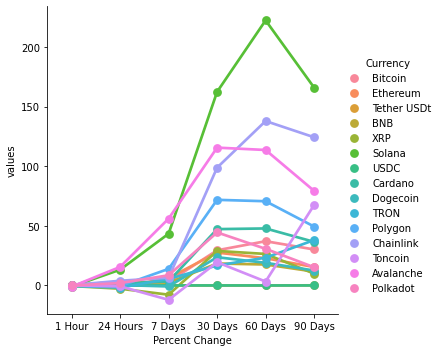

In [55]:
sns.catplot(x='Percent Change', y='values', hue='Currency', data=dfIndex, kind='point')